In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score

In [2]:
raw_data = pd.read_csv("adult22.csv")
data=raw_data.copy()

# Data cleaning

In [3]:
df=data.copy()

In [4]:
df.shape

(27651, 637)

In [59]:
columnas_selecion_previa =["DIBEV_A","SEX_A","AGEP_A","RACEALLP_A","EDUCP_A","URBRRL","HYPEV_A","CHLEV_A","FGEFRQTRD_A",
                           "VISIONDF_A","CHDEV_A","COPDEV_A","MIEV_A","ASEV_A","CANEV_A","ARTHEV_A","DEPEV_A","ANXEV_A",
                           "WEIGHTLBTC_A","HEIGHTTC_A","SMKCIGST_A","DRKSTAT_A", "MODFREQW_A", "VIGFREQW_A", "WLKTRAN_A", 
                           "WLKLEIS_A","SLPHOURS_A","SLPREST_A","SODANO_A","SODATP_A","FRTDRNO_A", "FRTDRTP_A","COFFEENO_A",
                           "COFFEENOTP_A","FRUITNO_A","FRUITTP_A","SALADNO_A","SALADTP_A","OVEGNO_A","OVEGTP_A","MARITAL_A"]



In [60]:
len(set(columnas_selecion_previa))

41

In [7]:
d=raw_data[columnas_selecion_previa]
d

,DIBEV_A,SEX_A,AGEP_A,RACEALLP_A,EDUCP_A,URBRRL,HYPEV_A,CHLEV_A,FGEFRQTRD_A,VISIONDF_A,...,FRUITTP_A,SALADNO_A,SALADTP_A,OVEGNO_A,OVEGTP_A,MODFREQW_A,VIGFREQW_A,WLKTRAN_A,WLKLEIS_A,MARITAL_A
0,2,1,85,1,4,2,1,2,1,1,...,3,1,3,1,3,3,94,2.0,2.0,3
1,2,1,64,1,8,4,1,1,2,1,...,3,5,2,4,2,7,1,2.0,1.0,1
2,1,2,37,1,8,4,2,2,2,1,...,2,4,2,7,2,7,3,2.0,1.0,1
3,2,2,72,1,5,4,1,2,1,1,...,0,3,2,4,2,94,94,2.0,2.0,2
4,2,2,84,2,6,1,1,2,1,1,...,2,1,3,1,1,94,94,2.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27646,2,1,64,1,4,4,2,2,1,2,...,2,3,2,2,2,14,5,2.0,1.0,3
27647,2,2,67,1,8,4,2,1,2,1,...,1,1,1,2,2,4,2,2.0,2.0,1
27648,2,2,69,1,7,4,2,1,1,1,...,3,2,2,1,1,94,94,2.0,1.0,1
27649,2,1,30,1,7,4,2,1,2,1,...,1,1,2,6,2,3,1,2.0,1.0,1


In [8]:
d.to_csv("adult22_45columns.csv",index=False)

In [9]:
m=pd.read_csv("adult22_45columns.csv")
m

,DIBEV_A,SEX_A,AGEP_A,RACEALLP_A,EDUCP_A,URBRRL,HYPEV_A,CHLEV_A,FGEFRQTRD_A,VISIONDF_A,...,FRUITTP_A,SALADNO_A,SALADTP_A,OVEGNO_A,OVEGTP_A,MODFREQW_A.1,VIGFREQW_A.1,WLKTRAN_A.1,WLKLEIS_A.1,MARITAL_A
0,2,1,85,1,4,2,1,2,1,1,...,3,1,3,1,3,3,94,2.0,2.0,3
1,2,1,64,1,8,4,1,1,2,1,...,3,5,2,4,2,7,1,2.0,1.0,1
2,1,2,37,1,8,4,2,2,2,1,...,2,4,2,7,2,7,3,2.0,1.0,1
3,2,2,72,1,5,4,1,2,1,1,...,0,3,2,4,2,94,94,2.0,2.0,2
4,2,2,84,2,6,1,1,2,1,1,...,2,1,3,1,1,94,94,2.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27646,2,1,64,1,4,4,2,2,1,2,...,2,3,2,2,2,14,5,2.0,1.0,3
27647,2,2,67,1,8,4,2,1,2,1,...,1,1,1,2,2,4,2,2.0,2.0,1
27648,2,2,69,1,7,4,2,1,1,1,...,3,2,2,1,1,94,94,2.0,1.0,1
27649,2,1,30,1,7,4,2,1,2,1,...,1,1,2,6,2,3,1,2.0,1.0,1


## unknowns as text

In [10]:
list_replace_7_8_9=["HYPEV_A","CHLEV_A","CHDEV_A","COPDEV_A","MIEV_A","ASEV_A","CANEV_A","DIBEV_A","ARTHEV_A","DEPEV_A","BMICAT_A","LSATIS4_A","PHSTAT_A","SEX_A","WLKTRAN_A","WLKLEIS_A","FGEFRQTRD_A",
                            "SMKCIGST_A","SLPREST_A","MEDITATE_A","LEGMSTAT_A",
                             "CHLEV_A"]
list_replace_97_98_99=["AGEP_A","EDUCP_A","VIGFREQW_A","WLKLEISDAY_A","SLPHOURS_A","MODFREQW_A","DRK12MWK_A"]



In [11]:
for item in list_replace_7_8_9:
    df.loc[df[item].isin([7,8,9]),item] = np.nan
    
for item in list_replace_97_98_99:
    df.loc[df[item].isin([97,98,99]),item] = np.nan
        

In [12]:
#pd.DataFrame({"a":df[df.isin([7,8,9])].sum(),"b":df.isin([97,98,99]).sum()}).head(3)

# Calculated fields (enfermedad)

# Calculated fields (diet)

In [13]:
def frecuency_cal (tupl):
    column_freq=tupl[0]
    column_period=tupl[1]
    df.loc[df[column_freq].isin([997,998,999]), column_freq]=np.nan
    df.loc[df[column_period].isin([7,8,9]), column_freq]=np.nan
    
    column_period_per_day=df[column_period].copy().replace({2:7,3:30})
    
    new_column_name ="new_"+ column_period[:5] 
    df.loc[df[column_period] != 0, new_column_name] = df[column_freq] / column_period_per_day
    print(new_column_name)




In [14]:
list_to_transform=[("SODANO_A","SODATP_A"),("FRTDRNO_A", "FRTDRTP_A"),("COFFEENO_A","COFFEENOTP_A"),
                   ("FRUITNO_A","FRUITTP_A"),("SALADNO_A","SALADTP_A"),("OVEGNO_A","OVEGTP_A")]
new_columns=[]
for item in list_to_transform:
    frecuency_cal(item)
    
    

new_SODAT
new_FRTDR
new_COFFE
new_FRUIT
new_SALAD
new_OVEGT


In [15]:
df.shape

(27651, 643)

In [16]:
df["SLPHOURS_A"].value_counts().sort_index()

1.0       11
2.0       41
3.0      113
4.0      598
5.0     1652
6.0     5444
7.0     8370
8.0     8031
9.0     1399
10.0     657
11.0      75
12.0     193
13.0      22
14.0      23
15.0      14
16.0      18
17.0       4
18.0       7
19.0       1
20.0       4
22.0       1
24.0       1
Name: SLPHOURS_A, dtype: int64

# Combined fields

#Replacing for known values

In [17]:
df.loc[df["MODFREQW_A"].isin([94,95,96]),"MODFREQW_A"]=0

In [18]:
df.loc[df["VIGFREQW_A"].isin([94,95,96]),"VIGFREQW_A"]=0

 * 2 because 30 min modarate activity is like 1 hour intensive activity

walking

# Target balancing

<AxesSubplot:>

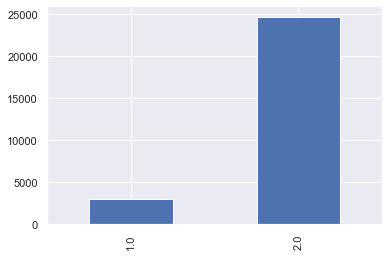

In [19]:
df["DIBEV_A"].value_counts().sort_index().plot.bar()

In [20]:
df["DIBEV_A"].value_counts()

2.0    24673
1.0     2946
Name: DIBEV_A, dtype: int64

In [29]:
matr_1=df[df["DIBEV_A"]==1].copy()
matr_2=df[df["DIBEV_A"]==2].copy()
df_balanced=pd.concat((matr_1,matr_2.iloc[:2946,:]))

# Atributes

In [30]:
df_balanced["DIBEV_A"].value_counts()

1.0    2946
2.0    2946
Name: DIBEV_A, dtype: int64

In [23]:
df_balanced["AGEP_A"].value_counts().sort_index()

18.0     23
19.0     28
20.0     28
21.0     31
22.0     33
       ... 
81.0     65
82.0     74
83.0     59
84.0     56
85.0    247
Name: AGEP_A, Length: 68, dtype: int64

In [24]:
df_balanced["AGEP_A"].isnull().sum()

12

# Muy importante para ver si cateoria afecta a diabetis

<AxesSubplot:xlabel='URBRRL'>

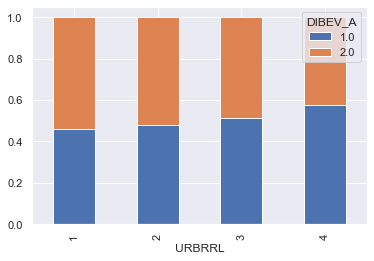

In [25]:
x_var, y_var = "URBRRL", "DIBEV_A"
df_grouped = df_balanced.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)
df_grouped.plot.bar(stacked=True)

<AxesSubplot:xlabel='HYPEV_A'>

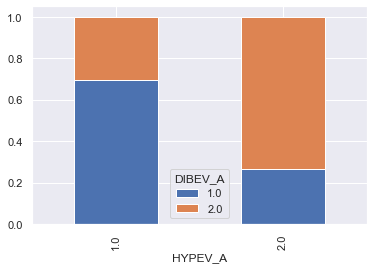

In [61]:
x_var, y_var = "HYPEV_A", "DIBEV_A"
df_grouped = df_balanced.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)
df_grouped.plot.bar(stacked=True)

In [62]:
df_balanced["HYPEV_A"].isnull().sum()

4

In [63]:
d_experiment=df_balanced[columnas_selecion_previa]
d_experiment

,DIBEV_A,SEX_A,AGEP_A,RACEALLP_A,EDUCP_A,URBRRL,HYPEV_A,CHLEV_A,FGEFRQTRD_A,VISIONDF_A,...,FRTDRTP_A,COFFEENO_A,COFFEENOTP_A,FRUITNO_A,FRUITTP_A,SALADNO_A,SALADTP_A,OVEGNO_A,OVEGTP_A,MARITAL_A
2,1.0,2.0,37.0,1,8.0,4,2.0,2.0,2.0,1,...,0,7.0,2,7.0,2,4.0,2,7.0,2,1
12,1.0,1.0,69.0,1,5.0,1,1.0,1.0,2.0,2,...,8,NaN,8,NaN,8,NaN,8,NaN,8,8
16,1.0,2.0,78.0,1,1.0,4,2.0,2.0,2.0,1,...,0,2.0,1,0.0,0,0.0,0,1.0,2,3
25,1.0,1.0,59.0,1,8.0,3,1.0,1.0,4.0,2,...,0,0.0,0,1.0,3,1.0,3,31.0,3,3
68,1.0,2.0,76.0,1,1.0,4,1.0,2.0,3.0,1,...,0,3.0,2,1.0,1,2.0,2,5.0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,2.0,1.0,65.0,1,8.0,2,2.0,2.0,1.0,1,...,0,1.0,1,2.0,2,1.0,2,2.0,2,3
3260,2.0,2.0,41.0,1,8.0,2,2.0,2.0,2.0,1,...,0,0.0,0,1.0,2,5.0,3,0.0,0,1
3261,2.0,2.0,67.0,1,7.0,2,1.0,2.0,2.0,1,...,0,0.0,0,7.0,1,1.0,2,1.0,2,3
3262,2.0,1.0,54.0,1,4.0,2,1.0,1.0,2.0,1,...,0,1.0,1,0.0,0,0.0,0,1.0,3,3


In [64]:
#aqui solo hay que incluir test, pero como experimento pongo todos
x_train=d_experiment.drop(["DIBEV_A","AGEP_A","WEIGHTLBTC_A","HEIGHTTC_A"], axis=1).fillna(1)
y_train=d_experiment["DIBEV_A"]

In [65]:
x_train

,SEX_A,RACEALLP_A,EDUCP_A,URBRRL,HYPEV_A,CHLEV_A,FGEFRQTRD_A,VISIONDF_A,CHDEV_A,COPDEV_A,...,FRTDRTP_A,COFFEENO_A,COFFEENOTP_A,FRUITNO_A,FRUITTP_A,SALADNO_A,SALADTP_A,OVEGNO_A,OVEGTP_A,MARITAL_A
2,2.0,1,8.0,4,2.0,2.0,2.0,1,2.0,1.0,...,0,7.0,2,7.0,2,4.0,2,7.0,2,1
12,1.0,1,5.0,1,1.0,1.0,2.0,2,1.0,2.0,...,8,1.0,8,1.0,8,1.0,8,1.0,8,8
16,2.0,1,1.0,4,2.0,2.0,2.0,1,2.0,2.0,...,0,2.0,1,0.0,0,0.0,0,1.0,2,3
25,1.0,1,8.0,3,1.0,1.0,4.0,2,2.0,2.0,...,0,0.0,0,1.0,3,1.0,3,31.0,3,3
68,2.0,1,1.0,4,1.0,2.0,3.0,1,1.0,2.0,...,0,3.0,2,1.0,1,2.0,2,5.0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,1.0,1,8.0,2,2.0,2.0,1.0,1,2.0,2.0,...,0,1.0,1,2.0,2,1.0,2,2.0,2,3
3260,2.0,1,8.0,2,2.0,2.0,2.0,1,2.0,2.0,...,0,0.0,0,1.0,2,5.0,3,0.0,0,1
3261,2.0,1,7.0,2,1.0,2.0,2.0,1,2.0,2.0,...,0,0.0,0,7.0,1,1.0,2,1.0,2,3
3262,1.0,1,4.0,2,1.0,1.0,2.0,1,2.0,2.0,...,0,1.0,1,0.0,0,0.0,0,1.0,3,3


In [66]:
y_train

2       1.0
12      1.0
16      1.0
25      1.0
68      1.0
       ... 
3259    2.0
3260    2.0
3261    2.0
3262    2.0
3263    2.0
Name: DIBEV_A, Length: 5892, dtype: float64

In [67]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

fs = SelectKBest(chi2)
fs.fit(x_train, y_train)
for i in range(len(fs.scores_)):
    print(x_train.columns[i]," : ", round(fs.scores_[i],2))

SEX_A  :  1.02
RACEALLP_A  :  4.17
EDUCP_A  :  241.13
URBRRL  :  17.66
HYPEV_A  :  184.42
CHLEV_A  :  136.9
FGEFRQTRD_A  :  22.08
VISIONDF_A  :  29.54
CHDEV_A  :  11.67
COPDEV_A  :  3.47
MIEV_A  :  4.37
ASEV_A  :  2.5
CANEV_A  :  4.73
ARTHEV_A  :  48.0
DEPEV_A  :  5.53
ANXEV_A  :  1.05
SMKCIGST_A  :  5.23
DRKSTAT_A  :  255.1
MODFREQW_A  :  284.45
VIGFREQW_A  :  783.86
WLKTRAN_A  :  0.26
WLKLEIS_A  :  7.48
SLPHOURS_A  :  0.02
SLPREST_A  :  12.16
SODANO_A  :  342.96
SODATP_A  :  100.65
FRTDRNO_A  :  10.78
FRTDRTP_A  :  18.83
COFFEENO_A  :  966.3
COFFEENOTP_A  :  111.72
FRUITNO_A  :  202.16
FRUITTP_A  :  1.27
SALADNO_A  :  231.36
SALADTP_A  :  1.42
OVEGNO_A  :  168.26
OVEGTP_A  :  0.31
MARITAL_A  :  1.76


In [ ]:
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

In [ ]:
df_balanced.dtypes

In [ ]:
#1 significa presencia de enfermedades graves
df_balanced["new_serious_disease"]=df_balanced[df_balanced[["CHDEV_A","COPDEV_A","MIEV_A","ASEV_A","CANEV_A","ARTHEV_A","DEPEV_A","ANXEV_A"]]==1].sum(axis=1)

#condition_d.sum()

In [ ]:
df_balanced[["CHDEV_A","COPDEV_A","MIEV_A","ASEV_A","CANEV_A","ARTHEV_A","DEPEV_A","ANXEV_A","new_serious_disease"]]

In [ ]:
df_balanced["new_activity_per_day"] = df_balanced["MODFREQW_A"].fillna(0) + df_balanced["VIGFREQW_A"].fillna(0) * 2

In [ ]:
df_balanced["new_walking"]= np.where((df_balanced["WLKTRAN_A"]==1) | (df_balanced["WLKLEIS_A"]==1),1,2)


In [ ]:
df_balanced["new_shugar_drinks"]=  df_balanced[["new_FRTDR","new_COFFE","new_SODAT"]].sum(axis=1)
df_balanced["new_healthy_food"]= df_balanced [["new_FRUIT","new_SALAD","new_OVEGT"]].sum(axis=1)


In [ ]:
df_balanced["new_peso_altura"]=df_balanced["WEIGHTLBTC_A"].fillna(0)/df_balanced["HEIGHTTC_A"]

In [ ]:
col_ds_orig =["DIBEV_A","URBRRL","SEX_A","AGEP_A","RACEALLP_A","EDUCP_A","HYPEV_A","CHLEV_A","FGEFRQTRD_A","VISIONDF_A",
              "WEIGHTLBTC_A","HEIGHTTC_A","SMKCIGST_A","DRKSTAT_A","SLPHOURS_A","SLPREST_A","MEDITATE_A","YOGA_A","MARITAL_A"]

col_diet_orig=["SODANO_A","SODATP_A","FRTDRNO_A", "FRTDRTP_A","COFFEENO_A","COFFEENOTP_A","FRUITNO_A","FRUITTP_A","SALADNO_A",
               "SALADTP_A","OVEGNO_A","OVEGTP_A"]

col_active_orig =["MODFREQW_A","VIGFREQW_A","WLKTRAN_A","WLKLEIS_A"]


col_disease_orig= ["CHDEV_A","COPDEV_A","MIEV_A","ASEV_A","CANEV_A","ARTHEV_A","DEPEV_A","ANXEV_A"]

 

In [ ]:
col_origin_total =col_ds_orig + col_diet_orig + col_active_orig + col_disease_orig

In [ ]:
#!!!!!!!!!esto empeora
col_diet_new=["new_shugar_drinks","new_healthy_food"]

col_active_new =["new_activity_per_day","new_walking"]

col_disease_new=["new_serious_disease"] 

new_peso_altura =["new_peso_altura"]

In [ ]:
col_new_total = col_ds_orig + col_diet_new +  col_active_new  + col_disease_new + new_peso_altura

# New columns and Correlacion

In [ ]:
l=list(set(col_new_total + col_origin_total))


In [ ]:
df_balanced[['DIBEV_A',"new_peso_altura","WEIGHTLBTC_A","HEIGHTTC_A"]].corr()['DIBEV_A'].abs().sort_values(ascending=False)

In [ ]:
df_balanced[['DIBEV_A',"new_serious_disease","CHDEV_A","COPDEV_A","MIEV_A","ASEV_A","CANEV_A","ARTHEV_A","DEPEV_A","ANXEV_A"]].corr()['DIBEV_A'].abs().sort_values(ascending=False)

In [ ]:
df_balanced[['DIBEV_A',"new_activity_per_day","new_walking","MODFREQW_A","VIGFREQW_A","WLKTRAN_A","WLKLEIS_A"]].corr()['DIBEV_A'].abs().sort_values(ascending=False)

In [ ]:
df_balanced[['DIBEV_A',"new_shugar_drinks","new_healthy_food","new_SODAT","new_FRTDR","new_COFFE","new_FRUIT","new_SALAD","new_OVEGT","SODANO_A","SODATP_A","FRTDRNO_A", "FRTDRTP_A","COFFEENO_A","COFFEENOTP_A","FRUITNO_A","FRUITTP_A","SALADNO_A",
               "SALADTP_A","OVEGNO_A","OVEGTP_A"]].corr()['DIBEV_A'].abs().sort_values(ascending=False)

In [ ]:
df_balanced[['DIBEV_A',"new_shugar_drinks","new_healthy_food","new_SODAT","new_FRTDR","new_COFFE","new_FRUIT","new_SALAD","new_OVEGT","SODANO_A","SODATP_A","FRTDRNO_A", "FRTDRTP_A","COFFEENO_A","COFFEENOTP_A","FRUITNO_A","FRUITTP_A","SALADNO_A",
               "SALADTP_A","OVEGNO_A","OVEGTP_A"]]

In [ ]:
matrix=df_balanced[l].corr()

In [ ]:
matrix['DIBEV_A'].abs().sort_values(ascending=False)

# Modeling

In [ ]:
list_of_columns_to_use = col_new_total
#list_of_columns_to_use =col_origin_total
df_1 = df_balanced[list_of_columns_to_use].copy()

In [ ]:
# target_column='DIBEV_A' 0.759


# Separate target from predictors
target_column='DIBEV_A'
df_1.dropna(subset=target_column,inplace=True)

X=df_1.drop(target_column,axis=1)
y=df_1[target_column]

# Divide data into training and validation subsets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=df_1['DIBEV_A'])

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
y.value_counts()

In [ ]:
X.dtypes

In [ ]:
X.isnull().sum().sort_values(ascending=False)

In [ ]:
X.head()

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
#my_scaler = StandardScaler()
my_scaler = RobustScaler()

In [ ]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('std_scaler', StandardScaler()),
 ])

In [ ]:
#defining a model
from sklearn.linear_model import LogisticRegression
my_model = LogisticRegression(random_state=0,max_iter=200,)

In [ ]:
# puting together our preprocessing and model
clf_LR=Pipeline(steps=[
    ("num_pipeline",num_pipeline),  
    ("my_model_RFR",my_model)
])

In [ ]:
clf_LR.fit(X_train,y_train)

In [ ]:
# predicting
y_predic=clf_LR.predict(X_test)

In [ ]:
#print ("root mean square error (RMSE)",np.sqrt(mean_squared_error(y_test,y_predic)))
#print ("R^2 score",r2_score(y_test, y_predic))
print("accuracy_score",accuracy_score(y_test, y_predic))
print ("precision",precision_score(y_test, y_predic,average='micro') )
print ("recall",recall_score(y_test, y_predic,average='weighted')) 
#???? >90% of the variability observed in the "Salary"  is explained by the  model

#Out of 100 predictions, our model predicted the correct element 73 times. Therefore, the accuracy of our model is 73%; 


SVM

In [ ]:
#from sklearn.svm import SVC

In [ ]:
#my_model_SVC = SVC(gamma='auto')

In [ ]:
#puting together our preprocessing and model
#clf_SVC=Pipeline(steps=[
#    ("num_pipeline",num_pipeline),
#    ("my_model_RFR",my_model_SVC)
#])

In [ ]:
#clf_SVC.fit(X_train,y_train)

In [ ]:
#y_predic_SVC=clf_SVC.predict(X_test)
#print("accuracy_score",accuracy_score(y_test,y_predic_SVC))
#print ("precision",precision_score(y_test, y_predic_SVC,average='micro') )
#print ("recall",recall_score(y_test, y_predic_SVC,average='weighted')) 

RanfomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
my_model_RanFor = RandomForestClassifier()

In [ ]:
# puting together our preprocessing and model
clf_RanFor = Pipeline(steps=[
    ("num_pipeline",num_pipeline),
    ("my_model_RanFor",my_model_RanFor)])

In [ ]:
clf_RanFor.fit(X_train,y_train)

In [ ]:
y_predic_RanFor=clf_RanFor.predict(X_test)
print ("accuracy_score",accuracy_score(y_test,y_predic_RanFor))
print ("precision",precision_score(y_test, y_predic_RanFor,average='micro'))
print ("recall",recall_score(y_test, y_predic_RanFor,average='weighted')) 

In [ ]:
cm = confusion_matrix(y_test, y_predic_RanFor)
cm